In [1]:
# Step 1: Load the datasets
import pandas as pd
from google.colab import files

# Upload CSV files
uploaded = files.upload()

# Assuming the files are named 'dynamic.csv' and 'static.csv'
dynamic_data = pd.read_csv('Download Driving.csv')
static_data = pd.read_csv('Download Static.csv')


Saving Download Driving.csv to Download Driving.csv
Saving Download Static.csv to Download Static.csv


In [2]:
# Step 2: Preprocess the data
# Checking for missing values
print(dynamic_data.isnull().sum())
print(static_data.isnull().sum())

Timestamp       0
Longitude       0
Latitude        0
Speed           0
Operatorname    0
CellID          0
NetworkMode     0
RSRP            0
RSRQ            0
SNR             0
CQI             0
RSSI            0
DL_bitrate      0
UL_bitrate      0
State           0
PINGAVG         0
PINGMIN         0
PINGMAX         0
PINGSTDEV       0
PINGLOSS        0
CELLHEX         0
NODEHEX         0
LACHEX          0
RAWCELLID       0
NRxRSRP         0
NRxRSRQ         0
dtype: int64
Timestamp       0
Longitude       0
Latitude        0
Speed           0
Operatorname    0
CellID          0
NetworkMode     0
RSRP            0
RSRQ            0
SNR             0
CQI             0
RSSI            0
DL_bitrate      0
UL_bitrate      0
State           0
PINGAVG         0
PINGMIN         0
PINGMAX         0
PINGSTDEV       0
PINGLOSS        0
CELLHEX         0
NODEHEX         0
LACHEX          0
RAWCELLID       0
NRxRSRP         0
NRxRSRQ         0
dtype: int64


No null values

In [3]:
# Ensure all necessary columns are present and correct
columns = ["Timestamp","RSRP", "SNR", "Speed", "DL_bitrate"]
dynamic_data = dynamic_data[columns]
static_data = static_data[columns]


In [4]:
# Function to preprocess the data
def preprocess_data(data):
    # Convert DL_bitrate from bits per second to Mbps
    data['DL_bitrate'] = data['DL_bitrate'] / 1_000_000

    # Convert the Timestamp to a datetime object
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y.%m.%d_%H.%M.%S')

    # Ensure data is sorted by Timestamp
    data = data.sort_values('Timestamp')

    # Calculate the time difference between each row
    data['Time_diff'] = data['Timestamp'].diff().dt.total_seconds().fillna(0)

    # Calculate the speed in Mbps for each interval
    data['Speed_Mbps'] = data['DL_bitrate'] / data['Time_diff']

    # Fill infinite values with 0 (since we can't divide by zero time interval)
    data['Speed_Mbps'].replace([float('inf'), -float('inf')], 0, inplace=True)

    return data

# Preprocess both datasets
dynamic_data = preprocess_data(dynamic_data)
static_data = preprocess_data(static_data)

# Display some statistics for dynamic data
print("Dynamic Data Statistics:")
print(dynamic_data[['Speed_Mbps']].describe())

# Display some statistics for static data
print("Static Data Statistics:")
print(static_data[['Speed_Mbps']].describe())


Dynamic Data Statistics:
         Speed_Mbps
count  27320.000000
mean       0.024661
std        0.054100
min        0.000000
25%        0.001175
50%        0.006582
75%        0.017225
max        0.532905
Static Data Statistics:
         Speed_Mbps
count  15502.000000
mean       0.061034
std        0.074457
min        0.000000
25%        0.008386
50%        0.024495
75%        0.086492
max        0.333070


<ipython-input-4-6291fb4533f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DL_bitrate'] = data['DL_bitrate'] / 1_000_000
<ipython-input-4-6291fb4533f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y.%m.%d_%H.%M.%S')
<ipython-input-4-6291fb4533f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [8]:
# List out the value range for SINR
dynamic_snr_range = (dynamic_data['SNR'].min(), dynamic_data['SNR'].max())
static_snr_range = (static_data['SNR'].min(), static_data['SNR'].max())

print(f"Dynamic Data SINR Range: {dynamic_snr_range}")
print(f"Static Data SINR Range: {static_snr_range}")

Dynamic Data SINR Range: ('-', '9.0')
Static Data SINR Range: (-11.0, 15.0)


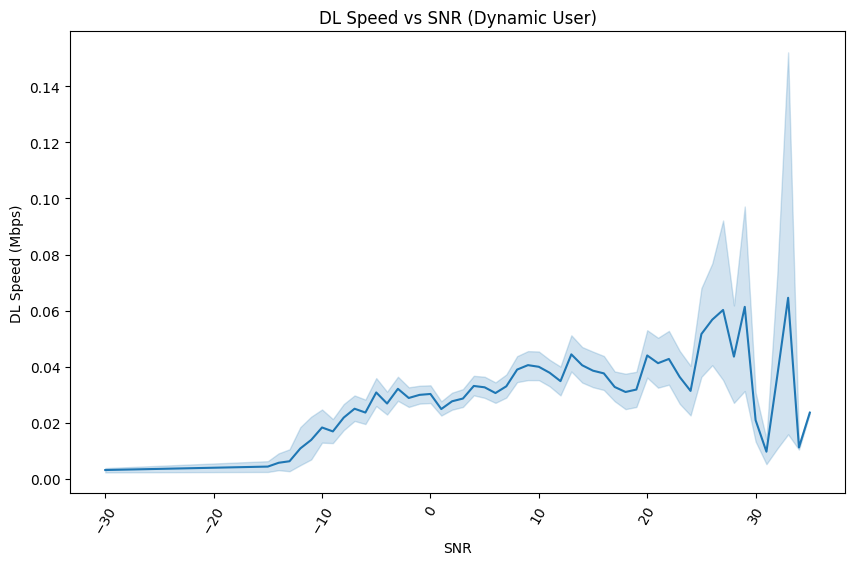

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'SNR' is numeric
dynamic_data['SNR'] = pd.to_numeric(dynamic_data['SNR'], errors='coerce')

# Sort the data by 'SNR'
dynamic_data = dynamic_data.sort_values(by='SNR')

plt.figure(figsize=(10, 6))
sns.lineplot(x='SNR', y='DL_bitrate', data=dynamic_data)
plt.title('DL Speed vs SNR (Dynamic User)')
plt.xlabel('SNR')
plt.xticks(rotation=60)
plt.ylabel('DL Speed (Mbps)')
plt.show()

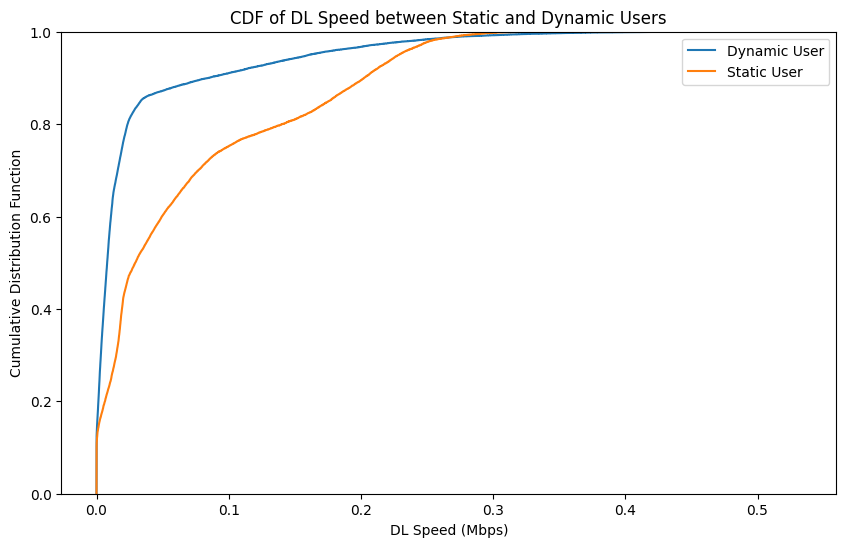

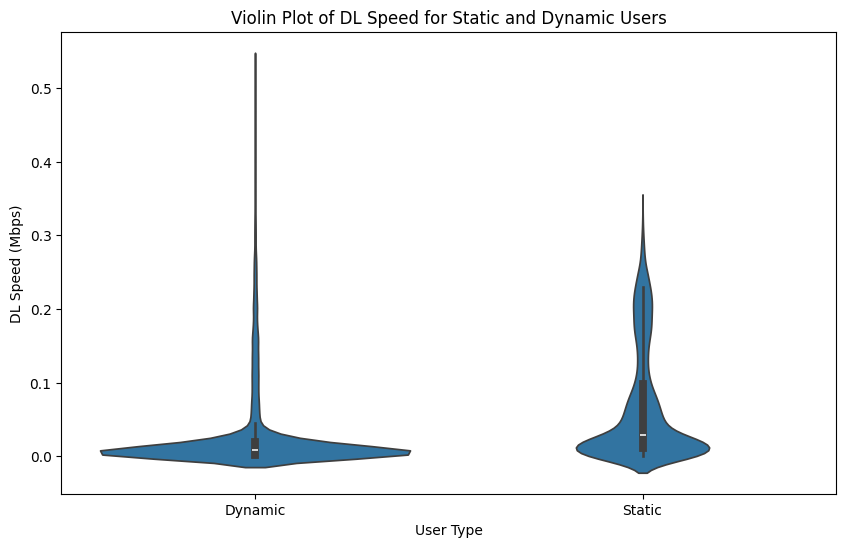

In [11]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=dynamic_data['DL_bitrate'], label='Dynamic User')
sns.ecdfplot(data=static_data['DL_bitrate'], label='Static User')
plt.title('CDF of DL Speed between Static and Dynamic Users')
plt.xlabel('DL Speed (Mbps)')
plt.ylabel('Cumulative Distribution Function')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='User_Type', y='DL_bitrate', data=pd.concat([dynamic_data.assign(User_Type='Dynamic'), static_data.assign(User_Type='Static')]))
plt.title('Violin Plot of DL Speed for Static and Dynamic Users')
plt.xlabel('User Type')
plt.ylabel('DL Speed (Mbps)')
plt.show()


<ipython-input-12-9339330f4da5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dynamic_data['RSRP'], label='Dynamic User', shade=True)
<ipython-input-12-9339330f4da5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(static_data['RSRP'], label='Static User', shade=True)


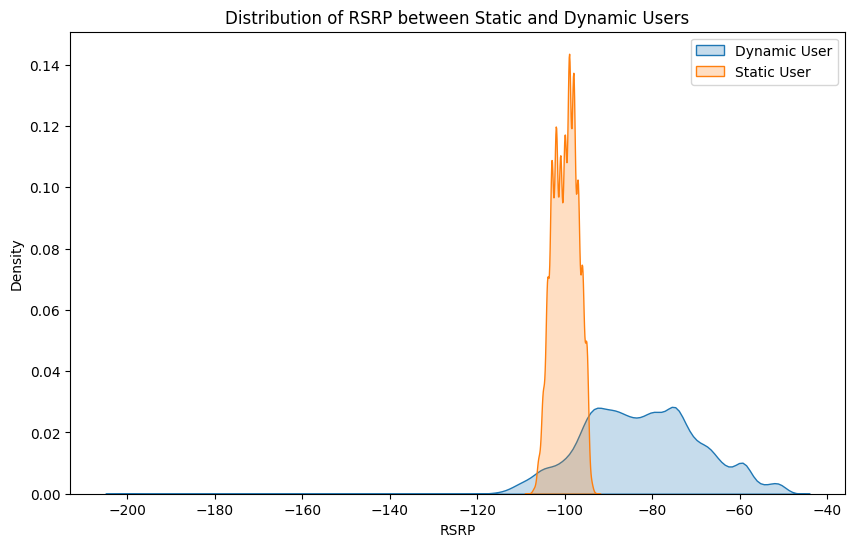

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(dynamic_data['RSRP'], label='Dynamic User', shade=True)
sns.kdeplot(static_data['RSRP'], label='Static User', shade=True)
plt.title('Distribution of RSRP between Static and Dynamic Users')
plt.xlabel('RSRP')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
# Ensure relevant columns are numeric
dynamic_data['Speed'] = pd.to_numeric(dynamic_data['Speed'], errors='coerce')
dynamic_data['RSRP'] = pd.to_numeric(dynamic_data['RSRP'], errors='coerce')
dynamic_data['DL_bitrate'] = pd.to_numeric(dynamic_data['DL_bitrate'], errors='coerce')

# Drop rows with missing values in relevant columns
dynamic_data = dynamic_data.dropna(subset=['Speed', 'RSRP', 'DL_bitrate'])

# Display the first few rows of the data
print(dynamic_data.head())

                Timestamp  RSRP   SNR  Speed  DL_bitrate  Time_diff  \
559   2019-12-14 10:25:52  -200 -30.0     22    0.002351        1.0   
558   2019-12-14 10:25:51  -200 -30.0     22    0.003879        1.0   
560   2019-12-14 10:25:53  -200 -30.0     15    0.003349        1.0   
16225 2019-12-16 07:39:57   -75 -15.0     28    0.006340        1.0   
16224 2019-12-16 07:39:56   -75 -15.0     28    0.002501        2.0   

       Speed_Mbps  
559      0.002351  
558      0.003879  
560      0.003349  
16225    0.006340  
16224    0.001251  


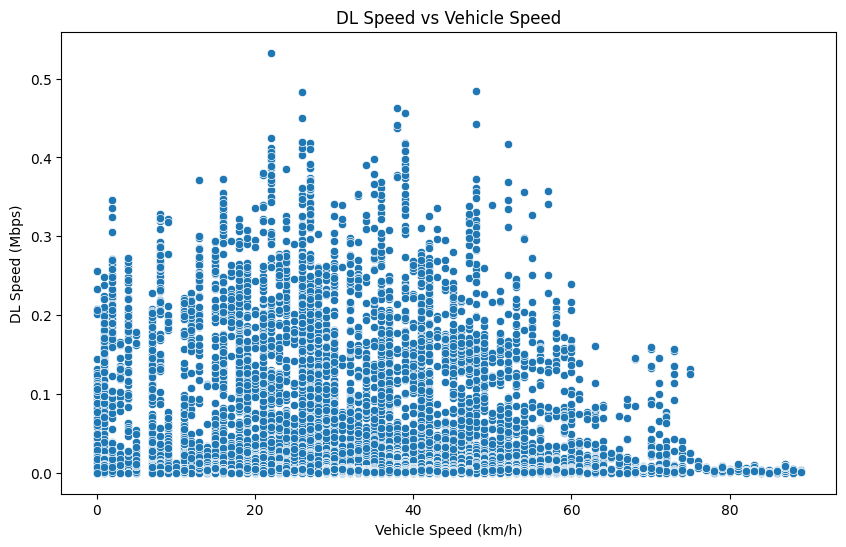

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of DL bitrate vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed', y='DL_bitrate', data=dynamic_data)
plt.title('DL Speed vs Vehicle Speed')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('DL Speed (Mbps)')
plt.show()




                Timestamp  RSRP   SNR  Speed  DL_bitrate  Time_diff  \
559   2019-12-14 10:25:52  -200 -30.0     22    0.002351        1.0   
558   2019-12-14 10:25:51  -200 -30.0     22    0.003879        1.0   
560   2019-12-14 10:25:53  -200 -30.0     15    0.003349        1.0   
16225 2019-12-16 07:39:57   -75 -15.0     28    0.006340        1.0   
16224 2019-12-16 07:39:56   -75 -15.0     28    0.002501        2.0   

       Speed_Mbps  
559      0.002351  
558      0.003879  
560      0.003349  
16225    0.006340  
16224    0.001251  
Mean Squared Error: 0.0035705738723443023
R-squared: 0.06017497722371967


<ipython-input-21-4bf4027baca8>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='red')


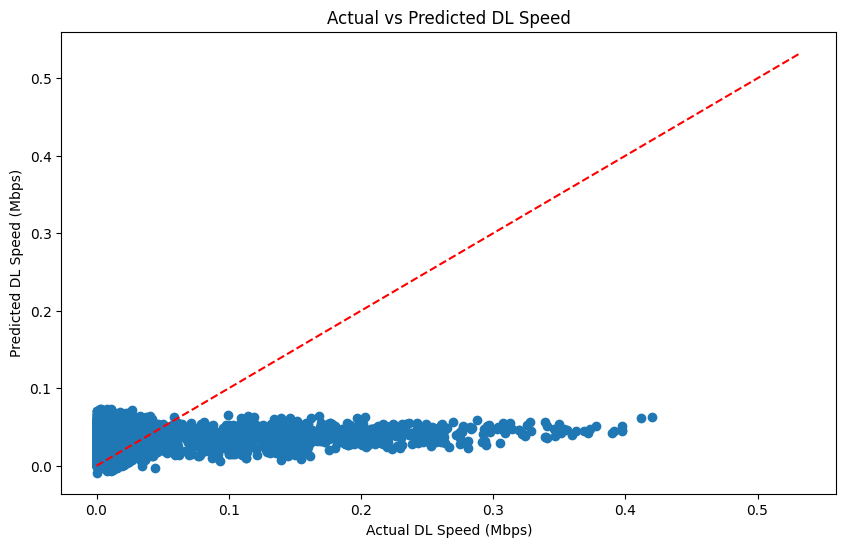

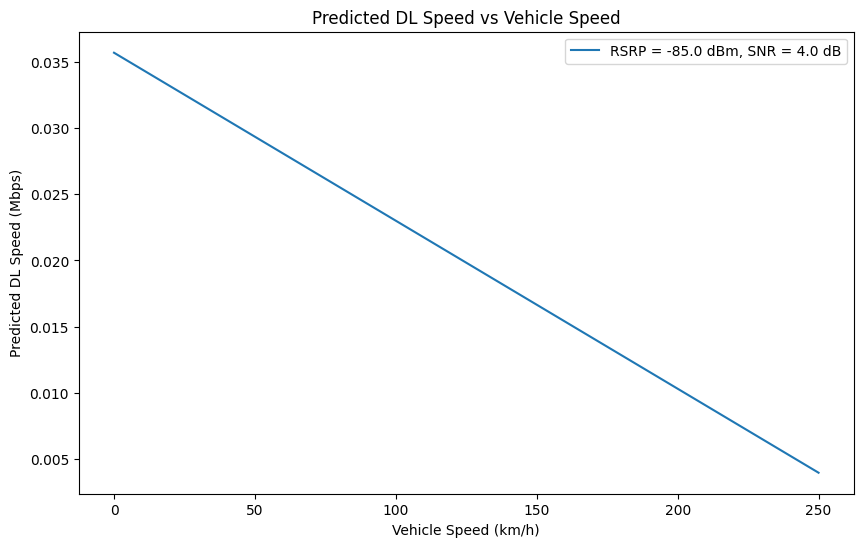

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure relevant columns are numeric
dynamic_data['Speed'] = pd.to_numeric(dynamic_data['Speed'], errors='coerce')
dynamic_data['RSRP'] = pd.to_numeric(dynamic_data['RSRP'], errors='coerce')
dynamic_data['SNR'] = pd.to_numeric(dynamic_data['SNR'], errors='coerce')
dynamic_data['DL_bitrate'] = pd.to_numeric(dynamic_data['DL_bitrate'], errors='coerce')

# Drop rows with missing values in relevant columns
dynamic_data = dynamic_data.dropna(subset=['Speed', 'RSRP', 'SNR', 'DL_bitrate'])

# Display the first few rows of the data
print(dynamic_data.head())

# Features and target variable
X = dynamic_data[['Speed', 'RSRP', 'SNR']]
y = dynamic_data['DL_bitrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='red')
plt.xlabel('Actual DL Speed (Mbps)')
plt.ylabel('Predicted DL Speed (Mbps)')
plt.title('Actual vs Predicted DL Speed')
plt.show()

# Step 1: Prepare the Prediction Data
# Create a range of speeds from 0 to 250 km/h
speeds = np.linspace(0, 250, 250)

# Use typical RSRP and SNR values (e.g., median values from the dataset)
typical_rsrp = dynamic_data['RSRP'].median()
typical_snr = dynamic_data['SNR'].median()

# Create a DataFrame for prediction
prediction_data = pd.DataFrame({'Speed': speeds, 'RSRP': typical_rsrp, 'SNR': typical_snr})

# Step 2: Make Predictions
predicted_dl_bitrate = model.predict(prediction_data)

# Step 3: Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.plot(speeds, predicted_dl_bitrate, label=f'RSRP = {typical_rsrp} dBm, SNR = {typical_snr} dB')
plt.title('Predicted DL Speed vs Vehicle Speed')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('Predicted DL Speed (Mbps)')
plt.legend()
plt.show()

                Timestamp  RSRP   SNR  Speed  DL_bitrate  Time_diff  \
559   2019-12-14 10:25:52  -200 -30.0     22    0.002351        1.0   
558   2019-12-14 10:25:51  -200 -30.0     22    0.003879        1.0   
560   2019-12-14 10:25:53  -200 -30.0     15    0.003349        1.0   
16225 2019-12-16 07:39:57   -75 -15.0     28    0.006340        1.0   
16224 2019-12-16 07:39:56   -75 -15.0     28    0.002501        2.0   

       Speed_Mbps  
559      0.002351  
558      0.003879  
560      0.003349  
16225    0.006340  
16224    0.001251  
Epoch 1/100
580/580 [==============================] - 3s 3ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 3/100
580/580 [==============================] - 1s 2ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 4/100
580/580 [==============================] -

<ipython-input-22-8bb60dfd7edb>:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='red')


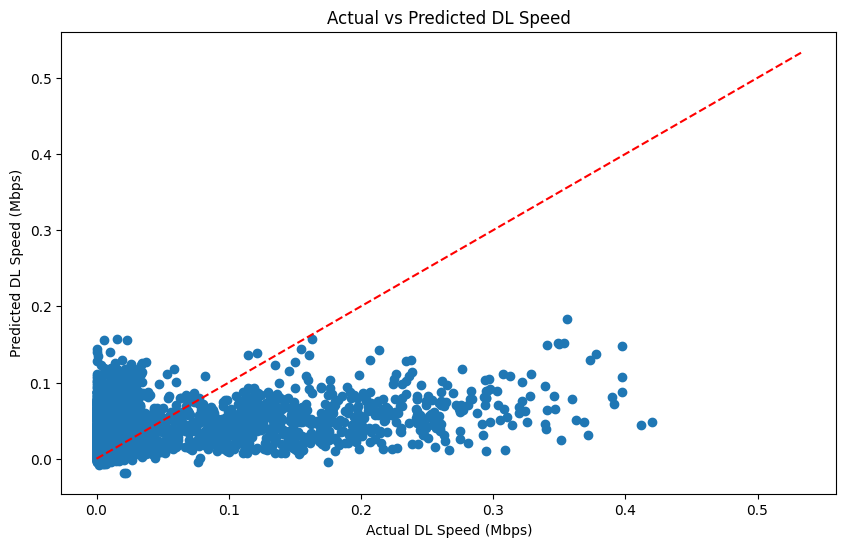

8/8 [==============================] - 0s 2ms/step


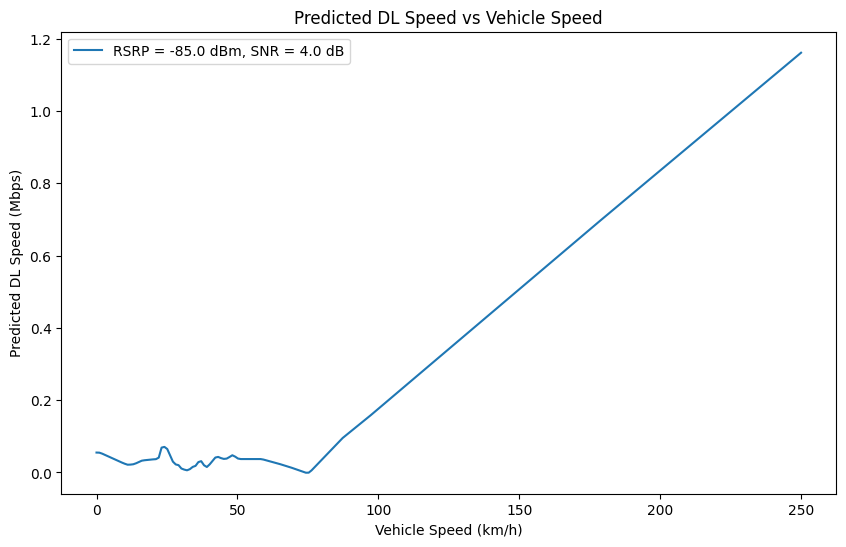

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Ensure relevant columns are numeric
dynamic_data['Speed'] = pd.to_numeric(dynamic_data['Speed'], errors='coerce')
dynamic_data['RSRP'] = pd.to_numeric(dynamic_data['RSRP'], errors='coerce')
dynamic_data['SNR'] = pd.to_numeric(dynamic_data['SNR'], errors='coerce')
dynamic_data['DL_bitrate'] = pd.to_numeric(dynamic_data['DL_bitrate'], errors='coerce')

# Drop rows with missing values in relevant columns
dynamic_data = dynamic_data.dropna(subset=['Speed', 'RSRP', 'SNR', 'DL_bitrate'])

# Display the first few rows of the data
print(dynamic_data.head())

# Features and target variable
X = dynamic_data[['Speed', 'RSRP', 'SNR']]
y = dynamic_data['DL_bitrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate the mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', color='red')
plt.xlabel('Actual DL Speed (Mbps)')
plt.ylabel('Predicted DL Speed (Mbps)')
plt.title('Actual vs Predicted DL Speed')
plt.show()

# Step 1: Prepare the Prediction Data
# Create a range of speeds from 0 to 250 km/h
speeds = np.linspace(0, 250, 250)

# Use typical RSRP and SNR values (e.g., median values from the dataset)
typical_rsrp = dynamic_data['RSRP'].median()
typical_snr = dynamic_data['SNR'].median()

# Create a DataFrame for prediction
prediction_data = pd.DataFrame({'Speed': speeds, 'RSRP': typical_rsrp, 'SNR': typical_snr})

# Standardize the prediction data
prediction_data_scaled = scaler.transform(prediction_data)

# Step 2: Make Predictions
predicted_dl_bitrate = model.predict(prediction_data_scaled).flatten()

# Step 3: Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.plot(speeds, predicted_dl_bitrate, label=f'RSRP = {typical_rsrp} dBm, SNR = {typical_snr} dB')
plt.title('Predicted DL Speed vs Vehicle Speed')
plt.xlabel('Vehicle Speed (km/h)')
plt.ylabel('Predicted DL Speed (Mbps)')
plt.legend()
plt.show()
